In [1]:
import pandas as pd
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from matplotlib import pyplot as plt
import numpy as np
import copy
import math
from sklearn.utils import resample
from scipy import stats

In [2]:
pd.options.display.max_columns = 50

In [3]:
subscribers = pd.read_pickle("subscribers")
subscribers

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,0.0,False,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,0.0,False,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,9.0,False,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509326,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,UAE,facebook,facebook_organic,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-11-17 14:12:33,8.0,False,2019-12-02,False,0.0000,0.3303,ar,False,False,NaN
229587,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,UAE,google_organic,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-06 18:02:13,NaN,True,2019-12-21,False,4.5875,0.3303,ar,True,False,Paypal
281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-21 19:40:44,31.0,True,2020-01-05,True,0.0000,0.0367,ar,False,False,NaN
87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-17 23:58:51,NaN,True,2020-02-01,False,NaN,NaN,ar,True,False,Paypal


In [4]:
engagement = pd.read_pickle("engagement")
engagement

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
28832315,28409777,2020-04-21,2.0,0.0,4.0,4.0,0.0,1.0,1.0
28832317,28409777,2020-04-22,2.0,0.0,4.0,4.0,0.0,1.0,1.0
28832319,28409777,2020-04-23,0.0,0.0,4.0,4.0,0.0,1.0,1.0
28832321,28409777,2020-04-24,1.0,0.0,3.0,4.0,1.0,1.0,1.0


In [5]:
service = pd.read_pickle("customer_service_reps")
service

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248409,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,3,2019-08-27 20:23:27,2019-09-24 20:23:29,NaN
2248410,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,4,2019-09-24 20:23:29,2019-10-25 20:23:28,NaN
2248411,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,5,2019-10-25 20:23:28,2019-11-24 20:23:29,NaN
2248412,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,6,2019-11-24 20:23:29,2019-12-25 20:23:27,NaN


# A/B Testing

In [6]:
test_base = subscribers[subscribers['plan_type'] == 'base_uae_14_day_trial']
test_base['churn'] = test_base['creation_until_cancel_days'].notnull().astype('int')
test_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227096 entries, 162502 to 598241
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         227096 non-null  int64         
 1   package_type                  191713 non-null  object        
 2   num_weekly_services_utilized  116840 non-null  float64       
 3   preferred_genre               190961 non-null  object        
 4   intended_use                  223731 non-null  object        
 5   weekly_consumption_hour       189345 non-null  float64       
 6   num_ideal_streaming_services  115251 non-null  float64       
 7   retarget_TF                   227096 non-null  bool          
 8   age                           191927 non-null  float64       
 9   male_TF                       226827 non-null  object        
 10  country                       227096 non-null  object        
 11  attribut

<ipython-input-6-48acd24d69f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_base['churn'] = test_base['creation_until_cancel_days'].notnull().astype('int')


In [7]:
test_high = subscribers[subscribers['plan_type'] == 'high_uae_14_day_trial']
test_high['churn'] = test_high['creation_until_cancel_days'].notnull().astype('int')
test_high

<ipython-input-7-be080ad30380>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_high['churn'] = test_high['creation_until_cancel_days'].notnull().astype('int')


,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,churn
43460,24333505,enhanced,2.921043,comedy,supplement OTT,30.201361,1.919544,False,59.0,False,UAE,facebook,tv,iOS,4,high_uae_14_day_trial,5.1013,5.0279,2019-11-05 00:05:37,NaN,True,2019-11-20,False,4.9545,0.0367,ar,True,False,Standard Charter,0
485756,27034473,base,NaN,other,access to exclusive content,24.401536,NaN,False,38.0,False,UAE,facebook,referral,Android,4,high_uae_14_day_trial,5.1013,5.0279,2019-11-05 05:55:45,1.0,False,2019-11-20,False,0.0000,0.0367,ar,False,False,NaN,1
595152,25845644,base,2.326824,comedy,replace OTT,25.851492,1.885196,False,28.0,False,UAE,search,public_radio,iOS,4,high_uae_14_day_trial,5.1013,5.0279,2019-11-04 20:13:50,13.0,False,2019-11-19,False,0.0000,0.0367,ar,False,False,NaN,1
450228,22387589,base,2.613224,comedy,access to exclusive content,18.601711,1.881311,False,39.0,False,UAE,facebook,facebook,Android,4,high_uae_14_day_trial,5.1013,5.0279,2019-11-04 18:28:59,10.0,False,2019-11-19,False,0.0000,0.0367,ar,False,False,NaN,1
488454,24132460,base,2.214091,comedy,replace OTT,28.751405,1.835327,False,25.0,False,UAE,facebook,facebook,iOS,4,high_uae_14_day_trial,5.1013,5.0279,2019-11-04 23:07:09,10.0,False,2019-11-19,False,0.0000,0.0367,ar,False,False,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568082,27965781,enhanced,NaN,comedy,access to exclusive content,30.201361,NaN,False,32.0,False,UAE,facebook,facebook,Android,4,high_uae_14_day_trial,5.1013,5.0279,2019-11-04 23:08:32,12.0,False,2019-11-19,False,0.0000,0.0367,ar,False,False,NaN,1
239447,23238995,base,2.921040,comedy,other,30.201361,1.854255,False,42.0,False,UAE,brand sem intent google,facebook,iOS,4,high_uae_14_day_trial,5.1013,5.0279,2019-11-05 23:27:57,NaN,True,2019-11-20,False,4.9545,0.0367,ar,True,False,Paypal,0
416515,28319690,enhanced,NaN,comedy,access to exclusive content,27.301448,NaN,False,58.0,False,UAE,facebook,facebook,iOS,4,high_uae_14_day_trial,5.1013,5.0279,2019-11-04 19:29:15,1.0,False,2019-11-19,False,0.0000,0.0367,ar,False,False,NaN,1
551418,20764619,enhanced,NaN,drama,other,27.301448,NaN,False,49.0,False,UAE,facebook,facebook,iOS,4,high_uae_14_day_trial,5.1013,5.0279,2019-11-04 05:52:54,12.0,False,2019-11-19,False,0.0000,0.0367,ar,False,False,NaN,1


In [8]:
test_base['churn'].mean()

0.6669029837601719

In [9]:
test_high['churn'].mean()

0.7384615384615385

Ho: mean_base - mean_high = 0\ Ha: mean_base - mean_high > 0\ one-tail test

Ho: mean_b - mean_a = 0\ Ha: mean_b - mean_a != 0\ two-tail test

In [10]:
sample_size = 300

In [11]:
np.random.seed(seed=9)
# create a sample of 50 sample_A & sample_B
sample_high = resample(test_high, n_samples=sample_size, replace=False)
sample_base = resample(test_base, n_samples=sample_size, replace=False)

In [12]:
mean_difference = sample_high['churn'].mean() - sample_base['churn'].mean()
mean_difference

0.11333333333333329

In [13]:
se_base= sample_base['churn'].std()/(sample_size**0.5)
se_base

0.027921294063981996

In [14]:
z_95=stats.norm.ppf(q= 0.95,  #q=0.975/0.995 => 90%/ 95%/ 99% confidence interval
               loc = 0,               
               scale= 1)  
z_95

1.6448536269514722

In [15]:
z = mean_difference/se_base
z

4.0590286780271905

z>z_95, reject H0

# Attribution & allocation

In [16]:
channel_default = pd.read_csv("advertising_spend_data.xlsx - Spend for students.csv")
channel_default

,date,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
0,6/30/2019,"84,800","75,000","17,300","21,400","11,900","10,500","5,900","6,100"
1,7/31/2019,"60,000","75,600","17,300","21,300","12,000","29,800","6,000","6,600"
2,8/31/2019,"52,300","76,100","18,100","21,300","16,300","65,900","6,200","6,800"
3,9/30/2019,"49,000","75,800","18,900","21,300","16,400","73,700","6,000","7,400"
4,10/31/2019,"51,300","76,000","21,000","21,400","12,200","32,300","6,700","7,300"
5,11/30/2019,"56,100","75,900","21,400","21,600","11,700","9,800","6,300","7,300"
6,12/31/2019,"51,400","76,100","32,100","22,200","12,100","3,500","7,200","8,000"
7,1/31/2020,"49,000","75,500","33,600","22,700","14,300",300,"6,700","7,400"
8,2/29/2020,"49,700","76,600","30,100","21,700","15,000",300,"6,400","6,500"
9,3/31/2020,"49,100","78,000","22,700","21,200","17,600",300,"5,900","10,000"


In [17]:
channel = channel_default.melt(id_vars='date', 
        var_name="channel", 
        value_name="spending")

In [18]:
channel = channel.replace({'date':{'6/30/2019':'2019-06', 
                                   '7/31/2019':'2019-07',
                                  '8/31/2019':'2019-08',
                                  '9/30/2019':'2019-09',
                                  '10/31/2019':'2019-10',
                                  '11/30/2019':'2019-11',
                                  '12/31/2019':'2019-12',
                                  '1/31/2020':'2020-01',
                                  '2/29/2020':'2020-02',
                                  '3/31/2020':'2020-03'}})
                           
channel

,date,channel,spending
0,2019-06,facebook,"84,800"
1,2019-07,facebook,"60,000"
2,2019-08,facebook,"52,300"
3,2019-09,facebook,"49,000"
4,2019-10,facebook,"51,300"
...,...,...,...
75,2019-11,referral,"7,300"
76,2019-12,referral,"8,000"
77,2020-01,referral,"7,400"
78,2020-02,referral,"6,500"


In [19]:
subscribers['account_creation_month'] = subscribers['account_creation_date'].astype(str).str[:7]
subscribers['account_creation_month']

162502    2020-01
380374    2020-03
496617    2019-12
356799    2020-01
681701    2019-10
           ...   
509326    2019-11
229587    2019-12
281340    2019-12
87198     2020-01
598241    2019-11
Name: account_creation_month, Length: 227628, dtype: object

In [20]:
df_attrib = pd.DataFrame()
df_attrib['touch1'] = subscribers['attribution_survey']
df_attrib['touch2'] = subscribers['attribution_technical']
df_attrib['revenue'] = subscribers['revenue_net'].fillna(0)+subscribers['join_fee'].fillna(0)
df_attrib

,touch1,touch2,revenue
162502,facebook,facebook,0.0000
380374,facebook,facebook,0.3303
496617,facebook,organic,0.1101
356799,tv,search,0.0367
681701,youtube,discovery,0.0367
...,...,...,...
509326,facebook_organic,facebook,0.3303
229587,referral,google_organic,4.9178
281340,facebook,facebook,0.0367
87198,facebook,facebook,0.0000


In [21]:
touch1 = pd.DataFrame()
touch1['channel'] = df_attrib['touch1']
touch1['convert'] = 0.5
touch1['revenue'] = df_attrib['revenue']/2
touch2 = pd.DataFrame()
touch2['channel'] = df_attrib['touch2']
touch2['convert'] = 0.5
touch2['revenue'] = df_attrib['revenue']/2

In [22]:
touch1_total = touch1.groupby('channel')['convert'].sum()
touch2_total = touch2.groupby('channel')['convert'].sum()
revenue1_total = touch1.groupby('channel')['revenue'].sum()
revenue2_total = touch2.groupby('channel')['revenue'].sum()

In [23]:
convert = pd.merge(touch1_total, touch2_total, how='outer', right_on=['channel'],left_on=['channel'])
convert['convert_total'] = convert['convert_x'].fillna(0) + convert['convert_y'].fillna(0)
convert = convert.drop(['convert_x', 'convert_y'], axis = 1)
convert.reset_index(level=0, inplace=True)
convert

,channel,convert_total
0,affiliate,5928.0
1,amfm_radio,168.5
2,direct_mail,273.5
3,facebook,99688.5
4,facebook_organic,2018.5
5,other,4141.0
6,ott,800.5
7,pinterest,6960.5
8,podcast,1990.0
9,public_radio,3109.5


In [24]:
revenue = pd.merge(revenue1_total, revenue2_total, how='outer', right_on=['channel'],left_on=['channel'])
revenue['revenue_total'] = revenue['revenue_x'].fillna(0) + revenue['revenue_y'].fillna(0)
revenue = revenue.drop(['revenue_x', 'revenue_y'], axis = 1)
revenue.reset_index(level=0, inplace=True)
revenue

,channel,revenue_total
0,affiliate,9273.22755
1,amfm_radio,402.63570
2,direct_mail,656.41620
3,facebook,99206.87115
4,facebook_organic,3571.22195
5,other,8613.65515
6,ott,1147.11355
7,pinterest,11535.50730
8,podcast,3923.94565
9,public_radio,9991.94200


In [25]:
channel['spending'].replace(',','', regex=True, inplace=True)
channel['spending'] = channel['spending'].astype(int)
spending = channel.groupby('channel')['spending'].sum()
spending

channel
affiliate                  139500
brand sem intent google    216100
email                      760600
email_blast                226400
facebook                   552700
pinterest                   63300
referral                    73400
search                     232500
Name: spending, dtype: int64

In [106]:
cac = pd.merge(convert, spending, how='right', right_on=['channel'],left_on=['channel'])
cac['cac'] = cac['spending']/cac['convert_total']
cac = cac.sort_values(by=['cac'])
cac.to_csv('cac.csv')
cac

,channel,convert_total,spending,cac
4,facebook,99688.5,552700,5.544270
6,referral,13026.0,73400,5.634884
5,pinterest,6960.5,63300,9.094174
7,search,16899.0,232500,13.758211
1,brand sem intent google,9262.0,216100,23.331894
0,affiliate,5928.0,139500,23.532389
2,email,12845.0,760600,59.213702
3,email_blast,3638.5,226400,62.223444


In [105]:
roi = pd.merge(revenue, spending, how='right', right_on=['channel'],left_on=['channel'])
roi['roi'] = roi['revenue_total']/roi['spending']
roi = roi.sort_values(by=['roi'], ascending = False)
roi.to_csv('roi.csv')
roi

,channel,revenue_total,spending,roi
6,referral,24673.33660,73400,0.336149
5,pinterest,11535.50730,63300,0.182236
4,facebook,99206.87115,552700,0.179495
7,search,23578.94260,232500,0.101415
1,brand sem intent google,17167.03055,216100,0.079440
0,affiliate,9273.22755,139500,0.066475
3,email_blast,6823.30070,226400,0.030138
2,email,17590.38340,760600,0.023127


# Churn

In [28]:
subscribers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227628 entries, 162502 to 598241
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         227628 non-null  int64         
 1   package_type                  192054 non-null  object        
 2   num_weekly_services_utilized  117178 non-null  float64       
 3   preferred_genre               191302 non-null  object        
 4   intended_use                  224079 non-null  object        
 5   weekly_consumption_hour       189698 non-null  float64       
 6   num_ideal_streaming_services  115458 non-null  float64       
 7   retarget_TF                   227628 non-null  bool          
 8   age                           192459 non-null  float64       
 9   male_TF                       227359 non-null  object        
 10  country                       227628 non-null  object        
 11  attribut

In [29]:
churn_unscaled = pd.DataFrame()
churn_unscaled['num_weekly_services_utilized']= subscribers['num_weekly_services_utilized'].fillna(value = 999)
churn_unscaled['weekly_consumption_hour']= subscribers['weekly_consumption_hour'].fillna(value = 999)
churn_unscaled['num_ideal_streaming_services']= subscribers['num_ideal_streaming_services'].fillna(value = 999)
churn_unscaled['age']= subscribers['age'].fillna(value = 999)
churn_unscaled['age'].where(churn_unscaled['age'] < 100, 999, inplace=True)
churn_unscaled

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age
162502,999.000000,999.000000,999.000000,999.0
380374,999.000000,22.951579,999.000000,70.0
496617,3.362885,36.001186,1.951776,25.0
356799,999.000000,20.051667,999.000000,30.0
681701,3.731089,22.951579,2.506384,28.0
...,...,...,...,...
509326,2.594078,28.751405,1.905485,38.0
229587,2.361370,27.301448,1.835189,49.0
281340,999.000000,31.651317,999.000000,45.0
87198,999.000000,999.000000,999.000000,999.0


In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
churn_scaled = pd.DataFrame()
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result
churn_scaled = normalize(churn_unscaled)
churn_scaled

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age
162502,1.000000,1.000000,1.000000,1.000000
380374,1.000000,0.053434,1.000000,0.070070
496617,0.003317,0.066089,0.002872,0.025025
356799,1.000000,0.050622,1.000000,0.030030
681701,0.003686,0.053434,0.003427,0.028028
...,...,...,...,...
509326,0.002548,0.059059,0.002826,0.038038
229587,0.002315,0.057653,0.002755,0.049049
281340,1.000000,0.061871,1.000000,0.045045
87198,1.000000,1.000000,1.000000,1.000000


In [31]:
churn_dummy = pd.DataFrame()
churn_dummy['package_type'] = subscribers['package_type']#.fillna(value = 'none')
churn_dummy['preferred_genre'] = subscribers['preferred_genre']#.fillna(value = 'none')
churn_dummy['intended_use']= subscribers['intended_use']#.fillna(value = 'none')
churn_dummy['male_TF']= subscribers['male_TF']#.fillna(value = 'none')
churn_dummy['retarget_TF']= subscribers['retarget_TF'].notnull().astype('int')
churn_dummy['churn_TF'] = subscribers['creation_until_cancel_days'].notnull().astype('int')
churn_dummy

,package_type,preferred_genre,intended_use,male_TF,retarget_TF,churn_TF
162502,economy,comedy,access to exclusive content,False,1,0
380374,base,comedy,access to exclusive content,False,1,1
496617,enhanced,regional,replace OTT,True,1,1
356799,base,drama,replace OTT,False,1,1
681701,base,comedy,replace OTT,False,1,1
...,...,...,...,...,...,...
509326,enhanced,comedy,supplement OTT,False,1,1
229587,enhanced,comedy,replace OTT,False,1,0
281340,base,comedy,access to exclusive content,False,1,1
87198,base,comedy,access to exclusive content,False,1,0


In [102]:
churn_dummy['churn_TF'].value_counts()

1    151768
0     75860
Name: churn_TF, dtype: int64

In [32]:
churn_dummy = pd.get_dummies(churn_dummy, drop_first=True)
churn_dummy

,retarget_TF,churn_TF,package_type_economy,package_type_enhanced,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,male_TF_True
162502,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
380374,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
496617,1,1,0,1,0,0,0,1,0,0,0,0,1,0,1
356799,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0
681701,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509326,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0
229587,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
281340,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
87198,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
churn = churn_scaled.join(churn_dummy)
churn

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,retarget_TF,churn_TF,package_type_economy,package_type_enhanced,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,male_TF_True
162502,1.000000,1.000000,1.000000,1.000000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
380374,1.000000,0.053434,1.000000,0.070070,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
496617,0.003317,0.066089,0.002872,0.025025,1,1,0,1,0,0,0,1,0,0,0,0,1,0,1
356799,1.000000,0.050622,1.000000,0.030030,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0
681701,0.003686,0.053434,0.003427,0.028028,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509326,0.002548,0.059059,0.002826,0.038038,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0
229587,0.002315,0.057653,0.002755,0.049049,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
281340,1.000000,0.061871,1.000000,0.045045,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
87198,1.000000,1.000000,1.000000,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
churn.reset_index(inplace = True)
churn.drop(churn.columns[[0]], axis = 1, inplace=True)
churn

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,retarget_TF,churn_TF,package_type_economy,package_type_enhanced,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,male_TF_True
0,1.000000,1.000000,1.000000,1.000000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1.000000,0.053434,1.000000,0.070070,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.003317,0.066089,0.002872,0.025025,1,1,0,1,0,0,0,1,0,0,0,0,1,0,1
3,1.000000,0.050622,1.000000,0.030030,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0.003686,0.053434,0.003427,0.028028,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,0.002548,0.059059,0.002826,0.038038,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0
227624,0.002315,0.057653,0.002755,0.049049,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
227625,1.000000,0.061871,1.000000,0.045045,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
227626,1.000000,1.000000,1.000000,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
churn_train, churn_test = model_selection.train_test_split(churn, test_size=0.3, random_state=100)

In [36]:
y_col_name = 'churn_TF' # specify which column contains outcome variable y. Needs to be coded as binary True/False or 0/1
x_col_name = churn.columns.to_list()# list of x covariates
x_col_name.remove('churn_TF')
#add_constant_TF = True

In [37]:
#if add_constant_TF:
    #x_col_name.append('const')
    #churn_train = sm.add_constant(churn_train)
    #churn_test = sm.add_constant(churn_test)

In [38]:
lpm_model = sm.OLS(endog=churn_train[y_col_name], exog=churn_train[x_col_name])
lpm_results = lpm_model.fit()
print("\nRESULTS OF LINEAR MODEL FITTING\n")
print(lpm_results.summary())


RESULTS OF LINEAR MODEL FITTING

                            OLS Regression Results                            
Dep. Variable:               churn_TF   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     3982.
Date:                Sun, 12 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:12:23   Log-Likelihood:                -78041.
No. Observations:              159339   AIC:                         1.561e+05
Df Residuals:                  159321   BIC:                         1.563e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [39]:
# --- fit logistic regression
logit_model = sm.Logit(endog=churn_train[y_col_name], exog=churn_train[x_col_name])
logit_results = logit_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(logit_results.summary())

Optimization terminated successfully.
         Current function value: 0.480729
         Iterations 6

RESULTS OF LOGIT MODEL FITTING

                           Logit Regression Results                           
Dep. Variable:               churn_TF   No. Observations:               159339
Model:                          Logit   Df Residuals:                   159321
Method:                           MLE   Df Model:                           17
Date:                Sun, 12 Dec 2021   Pseudo R-squ.:                  0.2447
Time:                        15:12:25   Log-Likelihood:                -76599.
converged:                       True   LL-Null:                   -1.0141e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
num_weekly_serv

In [70]:
df_test

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,retarget_TF,churn_TF,package_type_economy,package_type_enhanced,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,male_TF_True,prob_churn_lpm,prob_churn_logit,random_draws,price_no_offer,accept_offer_prob,would_accept_offer_rand_draw,make_offer_lpm,accept_offer_lpm,price_lpm_offer,make_offer_logit,accept_offer_logit,price_logit_offer
159034,0.002256,0.046403,0.002795,0.072072,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0.698210,0.703498,0.548814,0.0,0.67,True,True,True,4.5,True,True,4.5
144969,0.002728,0.066089,0.002840,0.045045,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.772280,0.791226,0.715189,0.0,0.67,False,True,False,0.0,True,False,0.0
160529,1.000000,0.059059,1.000000,0.038038,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0.824083,0.855400,0.602763,0.0,0.67,True,True,True,4.5,True,True,4.5
123995,1.000000,0.057653,1.000000,0.053053,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0.816342,0.850385,0.544883,0.0,0.67,True,True,True,4.5,True,True,4.5
113117,0.002442,0.057653,0.002811,0.036036,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0.669617,0.674025,0.423655,0.0,0.67,True,True,True,4.5,True,True,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121481,1.000000,1.000000,1.000000,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.163220,0.154972,0.781109,4.5,1.00,True,False,False,4.5,False,False,4.5
136009,1.000000,1.000000,1.000000,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.163220,0.154972,0.749170,4.5,1.00,True,False,False,4.5,False,False,4.5
169190,0.002388,0.059059,0.002788,0.049049,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.759741,0.776378,0.748601,0.0,0.67,False,True,False,0.0,True,False,0.0
86252,1.000000,1.000000,1.000000,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.163220,0.154972,0.270056,4.5,1.00,True,False,False,4.5,False,False,4.5


In [40]:
# ----- EVALUATE MODEL PERFORMANCE -----
# --- evaluate model predictions on test set graphically
churn_test['prob_churn_lpm'] = lpm_results.predict(churn_test[x_col_name])
churn_test['prob_churn_logit'] = logit_results.predict(churn_test[x_col_name])

<ipython-input-40-01b6f9cff25b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_test['prob_churn_lpm'] = lpm_results.predict(churn_test[x_col_name])
<ipython-input-40-01b6f9cff25b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_test['prob_churn_logit'] = logit_results.predict(churn_test[x_col_name])


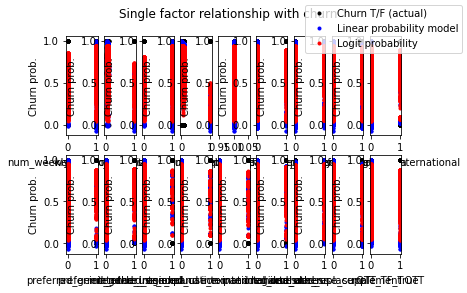

In [41]:
# plot predictions vs. data
select_plot_coef = [x for x in x_col_name]# if x != 'const']
n_rows = 2
n_cols = math.ceil(len(select_plot_coef) / n_rows)
fig, axes = plt.subplots(n_rows, n_cols)
fig.suptitle('Single factor relationship with churn')
for i in range(n_rows):
    for j in range(n_cols):
        select_coef = select_plot_coef[i * n_cols + j]
        axes[i, j].plot(churn_test[select_coef], churn_test['churn_TF'], 'k.')
        axes[i, j].plot(churn_test[select_coef], churn_test['prob_churn_lpm'], 'b.')
        axes[i, j].plot(churn_test[select_coef], churn_test['prob_churn_logit'], 'r.')
        axes[i, j].set(xlabel=select_coef, ylabel='Churn prob.')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])

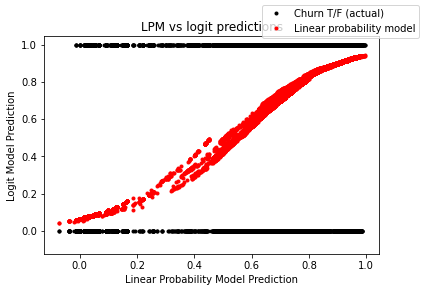

In [42]:
# compare lpm and logit predictions
fig = plt.figure()
ax = plt.gca()
ax.plot(churn_test[['prob_churn_lpm']], churn_test[['churn_TF']], 'k.')
ax.plot(churn_test[['prob_churn_lpm']], churn_test[['prob_churn_logit']], 'r.')
plt.ylim(churn_test[['prob_churn_lpm', 'prob_churn_logit']].min().min()-.05, churn_test[['prob_churn_lpm', 'prob_churn_logit']].max().max()+.05)
plt.xlim(ax.get_ylim())
plt.title('LPM vs logit predictions')
plt.xlabel('Linear Probability Model Prediction')
plt.ylabel('Logit Model Prediction')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])

In [43]:
def get_gini_info(actual, pred_prob):
    # format[[obs0_pred0, obs0_pred1], [obs1_pred0, obs1_pred1]]; rows (i) are observed, columns (j) are predicted
    confusion_matrix_list = list()
    for t in [x / 100 for x in range(0, 100, 33)]:
        pred = [1 if (x > t) else 0 for x in pred_prob]
        confusion_matrix_list.append(confusion_matrix(actual, pred))
        # confusion_matrix_list.append(model.pred_table(threshold=t))

    # create Gini coefficient plots
    false_positives = list()
    true_positives = list()
    for t in confusion_matrix_list:
        true_positives.append(t[1, 1])
        false_positives.append(t[0, 1])

    return confusion_matrix_list, false_positives, true_positives

In [44]:
# --- evaluate model predictions using numerical quantification (ROC curves)
# make confusion matrices
logit_conf_mat, logit_false_positives, logit_true_positives = get_gini_info(churn_test['churn_TF'], churn_test['prob_churn_logit'])
lpm_conf_mat, lpm_false_positives, lpm_true_positives = get_gini_info(churn_test['churn_TF'], churn_test['prob_churn_lpm'])

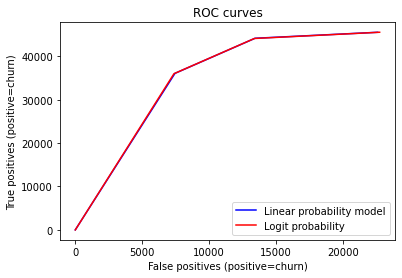

In [45]:
# plot ROC curves
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(lpm_false_positives, lpm_true_positives, 'b-')
ax1.plot(logit_false_positives, logit_true_positives, 'r-')
plt.title('ROC curves')
plt.xlabel('False positives (positive=churn)')
plt.ylabel('True positives (positive=churn)')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [46]:
def apply_offers(df, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn):
    df_f = copy.deepcopy(df)

    # set offer parameters for all observations
    df_f['price_no_offer'] = base_price
    df_f.loc[df_f['churn_TF'] == 1, 'price_no_offer'] = 0  # if the person churns they will pay 0

    # determine whether indiviudals accept offer
    df_f.loc[df_f['churn_TF'] == 1, 'accept_offer_prob'] = acceptance_rate_churn  # those who were going to churn are less likely to want the offer than those who were going to stay
    df_f.loc[df_f['churn_TF'] == 0, 'accept_offer_prob'] = acceptance_rate_nonchurn
    df_f['would_accept_offer_rand_draw'] = (df_f['random_draws'] < df_f['accept_offer_prob'])  # randomly select the individuals who would accept an offer based on their probability of acceptance

    # make offer under lpm predictions for select threshold
    df_f['make_offer_lpm'] = (df_f['prob_churn_lpm'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_lpm'] = (df_f['make_offer_lpm'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_lpm_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_lpm'], 'price_lpm_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    # make offer under logit predictions for select threshold
    df_f['make_offer_logit'] = (df_f['prob_churn_logit'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_logit'] = (df_f['make_offer_logit'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_logit_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_logit'], 'price_logit_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    df_impact = pd.DataFrame(index=cases, columns=['subs', 'revenue', 'lift_from_no_offer'])
    for c in cases:
        df_impact.loc[c, 'subs'] = (df_f['price_' + c] > 0).sum()
        df_impact.loc[c, 'revenue'] = df_f['price_' + c].sum()
    for c in cases:
        df_impact.loc[c, 'lift_from_no_offer'] = df_impact.loc[c, 'revenue'] / df_impact.loc['no_offer', 'revenue'] - 1

    return df_f, df_impact

In [47]:
subscribers.groupby('plan_type')['discount_price'].value_counts()

plan_type                          discount_price
base_eur_14_day_trial              4.2205                18
base_uae_14_day_trial              4.5141            227096
base_uae_no_trial_7_day_guarantee  4.4407                 1
high_aud_14_day_trial              3.7801                 2
high_jpy_14_day_trial              4.4407                 1
high_sar_14_day_trial              4.0737                12
high_uae_14_day_trial              5.0279               325
low_eur_no_trial                   1.1744                 1
low_gbp_14_day_trial               4.3673                 4
low_sar_no_trial                   0.7707                 1
low_uae_no_trial                   1.0276               167
Name: discount_price, dtype: int64

In [48]:
subscribers.groupby('plan_type')['monthly_price'].value_counts()

plan_type                          monthly_price
base_eur_14_day_trial              4.4407               18
base_uae_14_day_trial              4.7343           227096
base_uae_no_trial_7_day_guarantee  4.7343                1
high_aud_14_day_trial              4.0003                2
high_jpy_14_day_trial              4.6976                1
high_sar_14_day_trial              4.3673               12
high_uae_14_day_trial              5.1013              325
low_eur_no_trial                   1.1744                1
low_gbp_14_day_trial               4.7343                4
low_sar_no_trial                   0.8074                1
low_uae_no_trial                   1.0643              167
Name: monthly_price, dtype: int64

In [89]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.2
threshold = 0.5
base_price = 4.5
discount_amount = 0.2
cases = ['no_offer', 'lpm_offer', 'logit_offer']

In [90]:
# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
np.random.seed(0)
churn_test['random_draws'] = np.random.random(churn_test.shape[0])

<ipython-input-90-1a23a04a4d24>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_test['random_draws'] = np.random.random(churn_test.shape[0])


In [91]:
# base assessment
df_test, df_impact = apply_offers(churn_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

In [92]:
df_impact

,subs,revenue,lift_from_no_offer
no_offer,22760,102420.0,0.0
lpm_offer,31630,122634.9,0.197373
logit_offer,31536,122724.9,0.198251


In [93]:
# test sensitivity to thresholds
df_lift_threshold = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    _, t_df_impact = apply_offers(churn_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind

In [94]:
df_lift_threshold[(df_lift_threshold['logit_offer'] == max(df_lift_threshold['logit_offer']))]

,threshold,no_offer,lpm_offer,logit_offer
56,0.56,0.0,0.198269,0.19862


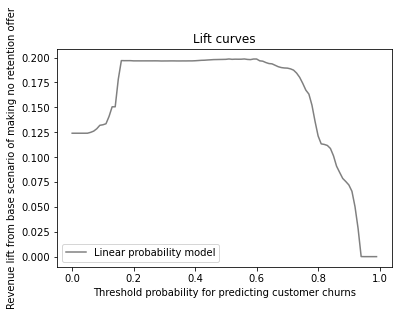

In [114]:
# --- plot lift curves
# Threshold sensitivity
fig = plt.figure()
ax1 = plt.gca()
#ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['lpm_offer'], 'b-')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['logit_offer'], color = 'grey')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [96]:
# test sensitivity to offer discount amount
df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    _, t_df_impact = apply_offers(churn_test, 0.61, base_price, t_discount_amount, cases, t_discount_amount, acceptance_rate_nonchurn )

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind

In [97]:
df_lift_discount_amount[(df_lift_discount_amount['logit_offer'] == max(df_lift_discount_amount['logit_offer']))]

,discount_amount,no_offer,lpm_offer,logit_offer
37,0.37,0.0,0.244656,0.247369


In [98]:
df_test_final, df_impact_final = apply_offers(churn_test, 0.56, base_price, 0.37, cases, 0.37, acceptance_rate_nonchurn)

In [99]:
df_impact_final

,subs,revenue,lift_from_no_offer
no_offer,22760,102420.0,0.0
lpm_offer,38715,127031.4,0.240299
logit_offer,38588,127150.875,0.241465


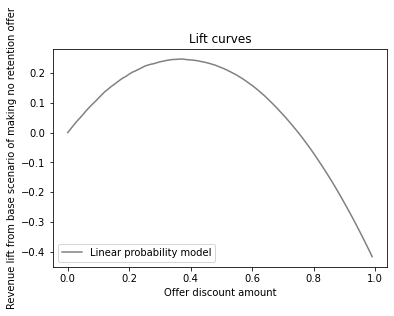

In [115]:
# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
#ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['lpm_offer'], 'b-')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['logit_offer'], color = 'grey')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])